# Key Levels Detection

In [8]:
import pandas as pd
df = pd.read_csv("EURUSD_Candlestick_1_Hour_BID_01.07.2020-15.07.2023.csv")
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head(10)

,time,open,high,low,close,volume
0,01.07.2020 00:00:00.000,1.12336,1.12336,1.12275,1.12306,4148.0298
1,01.07.2020 01:00:00.000,1.12306,1.12395,1.12288,1.12385,5375.5801
2,01.07.2020 02:00:00.000,1.12386,1.12406,1.12363,1.12382,4131.6099
3,01.07.2020 03:00:00.000,1.12382,1.12388,1.12221,1.12265,4440.6001
4,01.07.2020 04:00:00.000,1.12265,1.12272,1.12151,1.12179,4833.1001
5,01.07.2020 05:00:00.000,1.12179,1.12261,1.12156,1.12240,6689.5601
6,01.07.2020 06:00:00.000,1.12240,1.12343,1.12202,1.12333,7562.7500
7,01.07.2020 07:00:00.000,1.12331,1.12331,1.12231,1.12315,8641.7500
8,01.07.2020 08:00:00.000,1.12315,1.12448,1.12290,1.12311,10042.7695
9,01.07.2020 09:00:00.000,1.12313,1.12337,1.12076,1.12076,9587.4004


In [9]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    if l-n1 < 0 or l+n2 >= len(df1):
        return 0
    
    pividlow=1
    pividhigh=1
    for i in range(l-n1, l+n2+1):
        if(df1.low[l]>df1.low[i]):
            pividlow=0
        if(df1.high[l]<df1.high[i]):
            pividhigh=0
    if pividlow and pividhigh:
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0
    
df['pivot'] = df.apply(lambda x: pivotid(df, x.name,10,10), axis=1)

## Pivot Candles Vizualisation

In [10]:
df

,time,open,high,low,close,volume,pivot
0,01.07.2020 00:00:00.000,1.12336,1.12336,1.12275,1.12306,4148.0298,0
1,01.07.2020 01:00:00.000,1.12306,1.12395,1.12288,1.12385,5375.5801,0
2,01.07.2020 02:00:00.000,1.12386,1.12406,1.12363,1.12382,4131.6099,0
3,01.07.2020 03:00:00.000,1.12382,1.12388,1.12221,1.12265,4440.6001,0
4,01.07.2020 04:00:00.000,1.12265,1.12272,1.12151,1.12179,4833.1001,0
...,...,...,...,...,...,...,...
17763,14.07.2023 16:00:00.000,1.12356,1.12430,1.12330,1.12394,10580.8500,0
17764,14.07.2023 17:00:00.000,1.12395,1.12395,1.12265,1.12340,10621.8000,0
17765,14.07.2023 18:00:00.000,1.12341,1.12366,1.12315,1.12340,11268.2900,0
17766,14.07.2023 19:00:00.000,1.12340,1.12340,1.12258,1.12259,7467.4400,0


In [3]:
import numpy as np
def pointpos(x):
    if x['pivot']==1:
        return x['low']-1e-3
    elif x['pivot']==2:
        return x['high']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

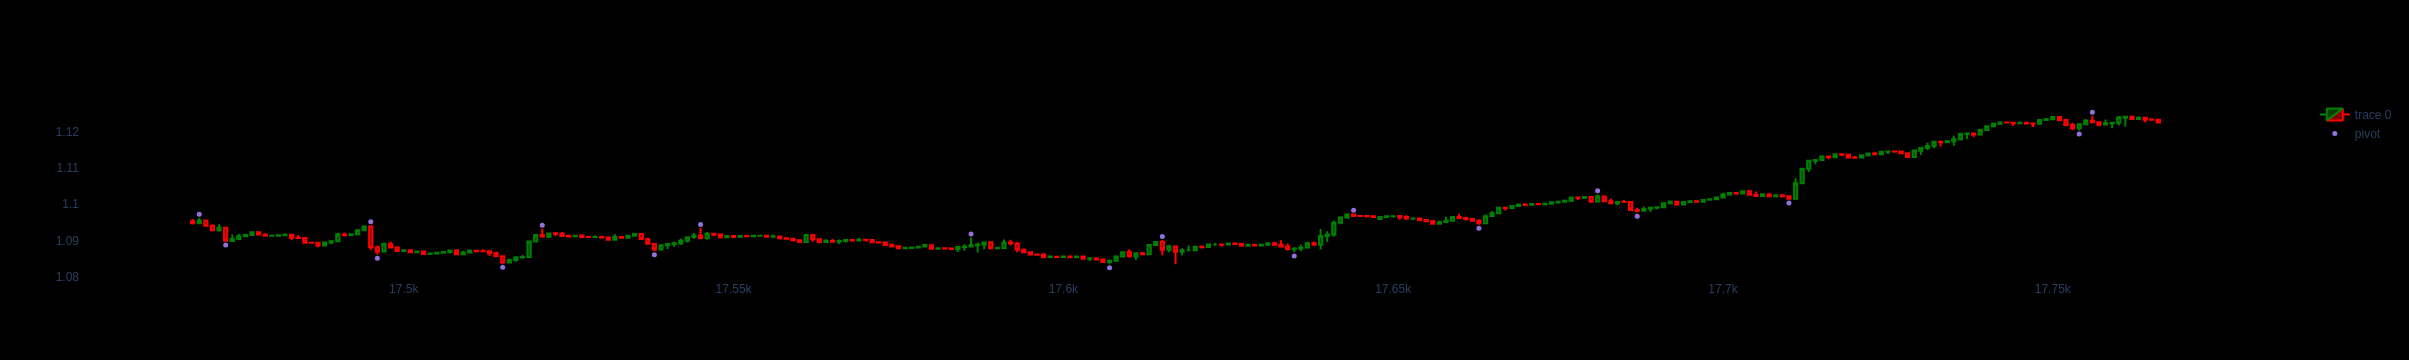

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[-300:-1]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'],
                increasing_line_color= 'green', 
                decreasing_line_color= 'red')])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black')

fig.show()

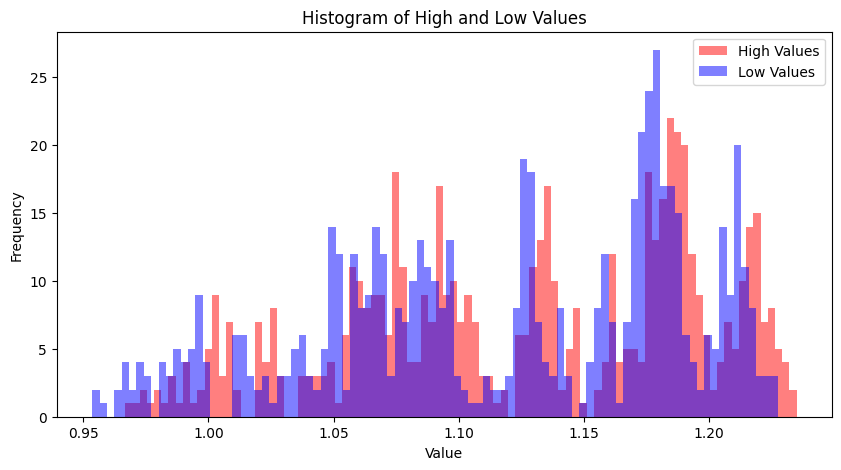

In [24]:
import matplotlib.pyplot as plt

dfkeys = df[:]

# Filter the dataframe based on the pivot column
high_values = dfkeys[dfkeys['pivot'] == 2]['high']
low_values = dfkeys[dfkeys['pivot'] == 1]['low']

# Define the bin width
bin_width = 0.003  # Change this value as needed

# Calculate the number of bins
bins = int((high_values.max() - low_values.min()) / bin_width)

# Create the histograms
plt.figure(figsize=(10, 5))
plt.hist(high_values, bins=bins, alpha=0.5, label='High Values', color='red')
plt.hist(low_values, bins=bins, alpha=0.5, label='Low Values', color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of High and Low Values')
plt.legend()